In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [3]:
!pip uninstall -y xgboost
!pip install xgboost==1.7.5

Found existing installation: xgboost 1.7.5
Uninstalling xgboost-1.7.5:
  Successfully uninstalled xgboost-1.7.5
  Using cached xgboost-1.7.5-py3-none-manylinux2014_x86_64.whl.metadata (1.9 kB)
Using cached xgboost-1.7.5-py3-none-manylinux2014_x86_64.whl (200.3 MB)


In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [5]:
X,y = load_breast_cancer(return_X_y=True)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [7]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

In [8]:
accuracy_score(y_test,y_pred)

0.9651162790697675

In [9]:
parameters = {
    'learning_rate' : [0.1,0.5],
    'n_estimators' : [50, 100],
    'max_depth' : [2,3],
    'subsample' : [0.5, 0.8],
    'colsample_bytree' : [0.5, 0.8],
    'use_label_encoder': [False],
    'eval_metric' : ['logloss']
}

In [10]:
grid = GridSearchCV(xgb,parameters,cv=5)

In [11]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.8],
                         'eval_metric': ['logloss'],
                         'learning_rate': [0.1, 0.5], 'max_depth': [2, 3],
                         'n_estimators': [50, 100], 'subsample': [0.5, 0.8],
                         'use_label_encoder': [False]})

In [12]:
grid.best_params_

{'colsample_bytree': 0.5,
 'eval_metric': 'logloss',
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5,
 'use_label_encoder': False}

In [15]:
xgb1 = XGBClassifier(colsample_bytree= 0.5,
 eval_metric = 'logloss',
 learning_rate = 0.1,
 max_depth = 3,
 n_estimators = 100,
 subsample = 0.5,
 )

In [16]:
xgb1.fit(X_train,y_train)
pred = xgb1.predict(X_test)

In [17]:
accuracy_score(y_test,pred)

0.9534883720930233

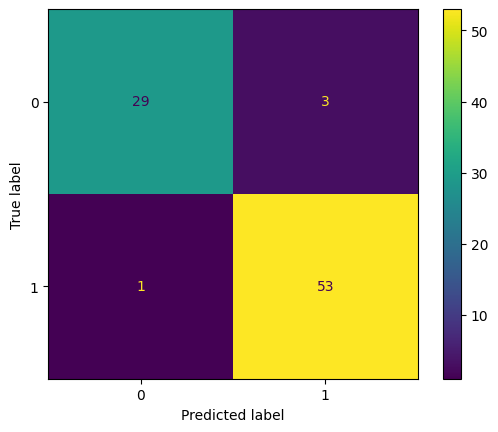

In [18]:
ConfusionMatrixDisplay(confusion_matrix(y_test,pred)).plot()